In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('../data/boston_housing.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


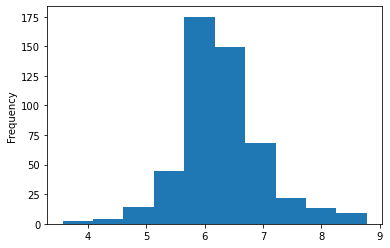

In [6]:
data.rm.plot.hist()
plt.show()

In [7]:
data = data.fillna(value=data.median())

In [8]:
X, Y = data.drop(columns='medv'), data['medv']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
features = X_train.columns.drop('chas')

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [12]:
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train = scaler.transform(Y_train.values.reshape(-1, 1))

# Ridge linear model

In [13]:
ridge = Ridge(alpha=0.1, fit_intercept=False)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1, fit_intercept=False)

In [14]:
preds = ridge.predict(X_test)
mean_squared_error(Y_test, scaler.inverse_transform(preds))

19.16197486965383

In [15]:
n_alphas = 200
alphas = np.logspace(-10, 0, n_alphas)

In [16]:
alphas

array([1.00000000e-10, 1.12266777e-10, 1.26038293e-10, 1.41499130e-10,
       1.58856513e-10, 1.78343088e-10, 2.00220037e-10, 2.24780583e-10,
       2.52353917e-10, 2.83309610e-10, 3.18062569e-10, 3.57078596e-10,
       4.00880633e-10, 4.50055768e-10, 5.05263107e-10, 5.67242607e-10,
       6.36824994e-10, 7.14942899e-10, 8.02643352e-10, 9.01101825e-10,
       1.01163798e-09, 1.13573336e-09, 1.27505124e-09, 1.43145894e-09,
       1.60705282e-09, 1.80418641e-09, 2.02550194e-09, 2.27396575e-09,
       2.55290807e-09, 2.86606762e-09, 3.21764175e-09, 3.61234270e-09,
       4.05546074e-09, 4.55293507e-09, 5.11143348e-09, 5.73844165e-09,
       6.44236351e-09, 7.23263390e-09, 8.11984499e-09, 9.11588830e-09,
       1.02341140e-08, 1.14895100e-08, 1.28989026e-08, 1.44811823e-08,
       1.62575567e-08, 1.82518349e-08, 2.04907469e-08, 2.30043012e-08,
       2.58261876e-08, 2.89942285e-08, 3.25508860e-08, 3.65438307e-08,
       4.10265811e-08, 4.60592204e-08, 5.17092024e-08, 5.80522552e-08,
      

In [17]:
coefs = []
scores = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_[0][0])
    preds = ridge.predict(X_test)
    scores.append(mean_squared_error(Y_test, scaler.inverse_transform(preds)))

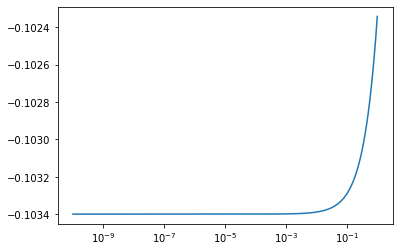

In [18]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.show()

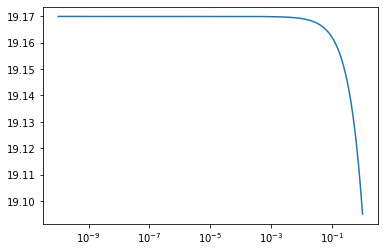

In [19]:
plt.plot(alphas, scores)
plt.xscale('log')
plt.show()

## Ridge Regression (with Kernel trick)

### Parameters:
<b> alpha</b>: float or array-like of shape (n_targets,), default=1.0
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number. See Ridge regression and classification for formula.

<b>kernel</b>: str or callable, default=”linear”
Kernel mapping used internally. This parameter is directly passed to pairwise_kernels. If kernel is a string, it must be one of the metrics in pairwise.PAIRWISE_KERNEL_FUNCTIONS or “precomputed”. If kernel is “precomputed”, X is assumed to be a kernel matrix. Alternatively, if kernel is a callable function, it is called on each pair of instances (rows) and the resulting value recorded. The callable should take two rows from X as input and return the corresponding kernel value as a single number. This means that callables from sklearn.metrics.pairwise are not allowed, as they operate on matrices, not single samples. Use the string identifying the kernel instead.

<b>gamma</b>: float, default=None
Gamma parameter for the RBF, laplacian, polynomial, exponential chi2 and sigmoid kernels. Interpretation of the default value is left to the kernel; see the documentation for sklearn.metrics.pairwise. Ignored by other kernels.

<b>degree</b>: int, default=3
Degree of the polynomial kernel. Ignored by other kernels.

<b>coef0</b>: float, default=1
Zero coefficient for polynomial and sigmoid kernels. Ignored by other kernels.

<b>kernel_params</b>: dict, default=None
Additional parameters (keyword arguments) for kernel function passed as callable object.

In [20]:
model = KernelRidge(alpha=1, kernel='linear') # , degree=4, gamma=1, coef0=1

## Repeated K-fold cross-validation

In [21]:
cv = KFold(n_splits=5)

In [22]:
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [23]:
preds = cross_val_predict(model, X, Y, cv=cv)

In [24]:
mean_squared_error(scaler.inverse_transform(Y), scaler.inverse_transform(preds))

34.40417480026226

In [25]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [26]:
mean_squared_error(Y_test, scaler.inverse_transform(y_pred))

19.229617102725545

### The Kernel trick

<b> Polynomial kernel </b>

In [27]:
model = KernelRidge(alpha=1, kernel='poly', degree=2, coef0=1)

In [28]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [29]:
mean_squared_error(Y_test, scaler.inverse_transform(y_pred))

10.274698534804376

In [30]:
preds = cross_val_predict(model, X, Y, cv=cv)

In [31]:
mean_squared_error(scaler.inverse_transform(Y), scaler.inverse_transform(preds))

20.344819040873528

In [32]:
train = []
test = []
for i in range(1,10):
    model = KernelRidge(alpha=1, kernel='poly', degree=i, gamma=1, coef0=1)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    training_score=mean_squared_error (Y_train,model.predict(X_train))
    test_score=mean_squared_error(Y_test, scaler.inverse_transform(y_pred))
    train.append(training_score)
    test.append(test_score)

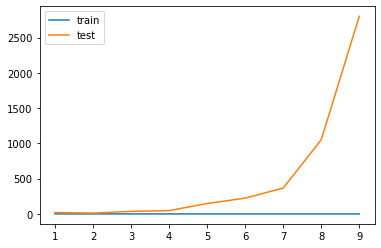

In [33]:
plt.plot(range(1, 10), train, label='train')
plt.plot(range(1, 10), test, label='test')
plt.legend()
plt.show()

## Decision Tree

### Some important parameters

<b>criterion</b>: {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error”
The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits. Training using “absolute_error” is significantly slower than when using “squared_error”.

<b>splitter</b>: {“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

<b>max_depth</b>: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

<b>min_samples_split</b>: int or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.



In [34]:
X, Y = data.drop(columns='medv'), data['medv']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
regressor = DecisionTreeRegressor(max_depth=100)

# Train Decision Tree Regressor
regressor.fit(X_train, Y_train)

# #Predict the response for test dataset
y_pred = regressor.predict(X_test)

In [37]:
mean_squared_error(Y_test, y_pred)

21.105784313725486

## Random Forest

<b>n_estimator</b>: sint, default=100
The number of trees in the forest.

Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.

<b>criterion</b>: {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error”
The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits. Training using “absolute_error” is significantly slower than when using “squared_error”.

New in version 0.18: Mean Absolute Error (MAE) criterion.

New in version 1.0: Poisson criterion.

<b>max_dept</b>: hint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

<b>min_samples_split</b>: int or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [38]:
rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)

In [39]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
mean_squared_error(Y_test, y_pred)

11.563709932930902